In [4]:
!pip install -U scikit-image
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


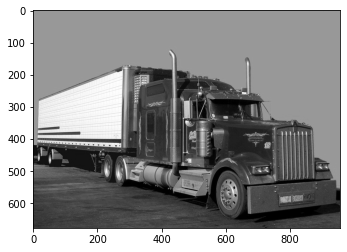

In [6]:
image_color = mpimg.imread("/content/truck_free_s.jpg")
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

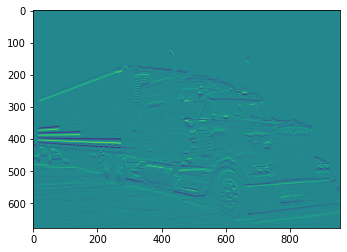

In [8]:
x_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize= 7)
plt.imshow(x_sobel)

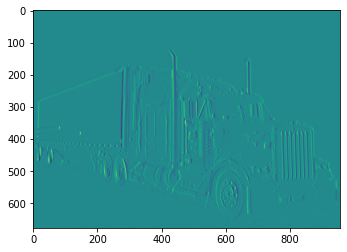

In [9]:
y_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize= 7)
plt.imshow(y_sobel)

#Perform Histogram of Oriented Gradient

In [12]:
features, hog_image = hog(image_gray, 
                                   orientations = 9, 
                                   pixels_per_cell = (16, 16), 
                                   cells_per_block = (1, 1), 
                                   transform_sqrt = False, 
                                   visualize = True, 
                                   feature_vector = False)

features.shape


(42, 59, 1, 1, 9)

In [13]:
features[30, 50, :]

array([[[0.61831344, 0.239528  , 0.08929305, 0.13864255, 0.1722288 ,
         0.200767  , 0.10970449, 0.2623034 , 0.61831344]]])

In [14]:
hog_image.shape

(678, 957)

In [16]:
from skimage import exposure

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0, 2))

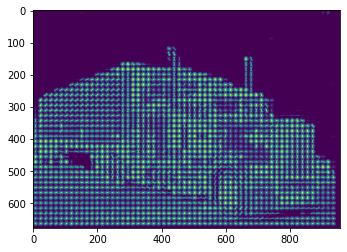

In [17]:
plt.imshow(hog_image_rescaled)